# **Projet P4 - révisions et pratique**

Vous allez travailler sur des données extraites de IMDB. On a déjà un peu manipulé des données de films donc vous serez pas complètement perdus comme ça. La variable d'intérêt sera la notation IMDB des films. En effet le succès commercial d'un film n'implique pas nécessairement sa qualité et il convient donc d'aller chercher plus loin que le simple profit dégagé d'une production cinématographique...
À vous !!

Les **objectifs** de ce projet sont multiples :
1. Réviser
2. Pratiquer
3. Vous auto-évaluer et vous évaluer (pour nous)
4. Vous rassurer et vous permettre de réaliser ce que vous savez faire pour pouvoir en parler

1. [Import des librairies](#import_lib)<br>
2. [Import des données](#import_data)<br>
3. [Nettoyage des donnéees](#data_cleaning)<br>
4. [Analyse exploratoire](#exploration)<br>
5. [Pré-traitement](#preprocess)<br>
6. [Une régression linéaire](#reglin)<br>
7. [D'autres modèles de régression](#autres_reg)<br>
8. [De la régression à la classification](#reg_to_class)<br>
9. [Une régression logistique](#reglog)<br>
10. [D'autres modèles de classification](#autre_class)<br>
11. [En option](#option)<br>
    11.1 [Un outil de recommandation](#reco)<br>
    11.2 [Sauvegarder un modèle](#save)<br>
    11.3 [Analyse en composantes principales](#acp)<br>

<a id='import_lib'></a>

## **1. Import des libraries**

**À FAIRE**

> Importer dans la cellule l'ensemble des librairies nécessaires à votre travail. L'idée n'est pas de savoir immédiatement tout ce dont vous aurez besoin mais de faire des aller-retours pour y ajouter vos librairies petit à petit. L'intérêt est une meilleure lisibilité pour un lecteur extérieur qui, en quelques lignes d'import, pourra déjà avoir une idée de ce qui a été fait.

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<a id='import_data'></a>

## **2. Import des données**

**À FAIRE**

> Importer les données `5000_movies_bis.csv` disponible à la racine de ce document.  
> Afficher les 7 premières lignes et **toutes** les colonnes.    
> Répondre aux questions suivantes (répondez à toutes les questions dans une seule cellule Markdown mais évidemment le code vous ayant permis d'extraire ces informations doit être présent):
>- combien y a-t-il d'observations/de variables ?
>- sur combien d'années se répartissent les données ?
>- combien de pays sont représentés ?
>- combien de réalisateurs différents dans la base ?
>- combien d'acteurs et d'actrices différentes ?

In [332]:
df_movies = pd.read_csv('5000_movies_bis.csv')
df_movies.head(7)

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


In [333]:
 ##  combien y a-t-il d'observations/de variables ?

df_movies.shape

## sur combien d'années se répartissent les données ?

np.max( df_movies['title_year']) - np.min( df_movies['title_year']) 

##  combien de pays sont représentés ?

df_movies['country'].value_counts().shape

## combien de réalisateurs différents dans la base ?

df_movies['director_name'].value_counts().shape

## combien d'acteurs et d'actrices différentes ?

df_movies['actor_2_name'].value_counts().shape


(3032,)

<a id='data_cleaning'></a>

In [334]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   5024 non-null   object 
 1   director_name           4939 non-null   object 
 2   num_critic_for_reviews  4993 non-null   float64
 3   duration                5028 non-null   float64
 4   director_fb_likes       4939 non-null   float64
 5   actor_3_fb_likes        5020 non-null   float64
 6   actor_2_name            5030 non-null   object 
 7   actor_1_fb_likes        5036 non-null   float64
 8   gross                   4366 non-null   float64
 9   genres                  5043 non-null   object 
 10  actor_1_name            5036 non-null   object 
 11  movie_title             5043 non-null   object 
 12  num_voted_users         5043 non-null   int64  
 13  cast_total_fb_likes     5043 non-null   int64  
 14  actor_3_name            5020 non-null   

In [335]:
df_movies['imdb_score'] 

0       7.9
1       7.1
2       6.8
3       8.5
4       7.1
       ... 
5038    7.7
5039    7.5
5040    6.3
5041    6.3
5042    6.6
Name: imdb_score, Length: 5043, dtype: float64

## **3. Nettoyage des données**

**À FAIRE**

> Vous allez dans cette partie vous occuper de faire les opérations de nettoyage sur les données. Cela implique donc de regarder en détail :
>- les doublons
>- les variables (à supprimer, à modifier etc...)
>- les valeurs manquantes
>- les zéros
> 
>Ajouter une courte explication des décisions que vous prendrez (gestion des valeurs manquantes, suppression ou modification de certaines variables, etc...).

#### **Les doublons**

In [336]:

# Identifier les doublons dans la dataframe 

dubs = df_movies.duplicated().sum()
dubs


45

On dispose de 45 doublons dans la dataframe dont pour plus de fiabilité, j'ai décidé de les supprimer 

#### **Suppression de variables**

In [337]:
#Suppression des doublons de la dataframe

df_without_dubs = df_movies.drop_duplicates() 
df_without_dubs.shape

(4998, 28)

#### **Les valeurs manquantes et les zéros**

**Gestion des zéros**

In [338]:
zero_value = df_without_dubs[df_without_dubs == 0]
zero_value.count()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_fb_likes          897
actor_3_fb_likes            89
actor_2_name                 0
actor_1_fb_likes            26
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_fb_likes         33
actor_3_name                 0
facenumber_in_poster      2136
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_fb_likes            55
imdb_score                   0
aspect_ratio                 0
movie_fb_likes            2162
dtype: int64

Pour les valeurs 0, je pense les garder étant donné que les colonnes concernées peuvent avoir potentiellement des valeurs nulles comme les nombres like sur facebook

**Gestion des NaN**

In [339]:
nan_value = df_without_dubs.isnull().sum().sum()
nan_value

2385

In [340]:
df = df_without_dubs.dropna()
df.shape

(3954, 28)

Et donc au total on a une proportition tres marginales des données manquantes moins de 2% de la dataframe, mais je decide de les supprimer

#### **Modification de variables**

## **4. Analyse exploratoire**

<a id='exploration'></a>

Dans cette partie, vous devez "explorer" vos données. Cette tâche, qui peut s'avérer très vaste, consiste à s'intéresser à l'information contenue dans nos données "au premier abord".

Sont donc attendus dans cette partie :
>- quelques statistiques descriptives
>- entre 6 et 10 visualisations (vous pouvez bien sûr en regrouper plusieurs sur une même figure)
>- et pour chaque résultat/graphique présenté, une explication succinte

In [341]:
df.describe()

,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_1_fb_likes,gross,num_voted_users,cast_total_fb_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
count,3954.000000,3954.000000,3954.000000,3954.00000,3954.000000,3.954000e+03,3.954000e+03,3954.000000,3954.000000,3954.000000,3.954000e+03,3954.000000,3954.000000,3954.000000,3954.000000,3954.000000
mean,163.228376,110.091553,792.111280,739.26783,7560.632777,5.032896e+07,1.019637e+05,11192.452200,1.364441,326.124937,4.437947e+07,2002.425139,1936.722307,6.470435,2.109987,8956.939049
std,122.124969,22.602958,3037.852481,1817.65378,15398.637513,6.846044e+07,1.488520e+05,18851.479884,2.030120,403.530212,2.204074e+08,10.650371,4425.096119,1.059353,0.415275,20934.289847
min,1.000000,37.000000,0.000000,0.00000,0.000000,1.620000e+02,6.200000e+01,0.000000,0.000000,1.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,74.000000,95.000000,10.000000,183.00000,729.250000,7.220048e+06,1.800650e+04,1844.250000,0.000000,104.000000,1.000000e+07,1999.000000,367.000000,5.900000,1.850000,0.000000
50%,135.000000,106.000000,61.000000,427.00000,1000.000000,2.744927e+07,5.046900e+04,3888.500000,1.000000,203.000000,2.300000e+07,2004.000000,664.500000,6.600000,2.350000,207.500000
75%,220.000000,120.000000,233.500000,681.00000,12000.000000,6.426473e+07,1.218718e+05,15849.500000,2.000000,387.750000,5.000000e+07,2010.000000,969.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.00000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


une analyse descriptive qui nous donne des quelques caractéristiques descriptives sur les différentes variables de la Dataframe notamment le min, max, moyenne, etc.

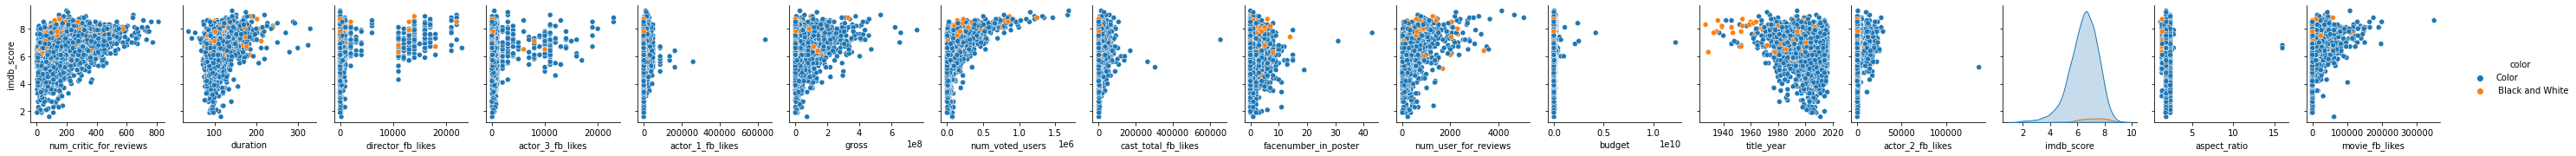

In [342]:
sns.pairplot(df, hue ='color', y_vars=['imdb_score'])

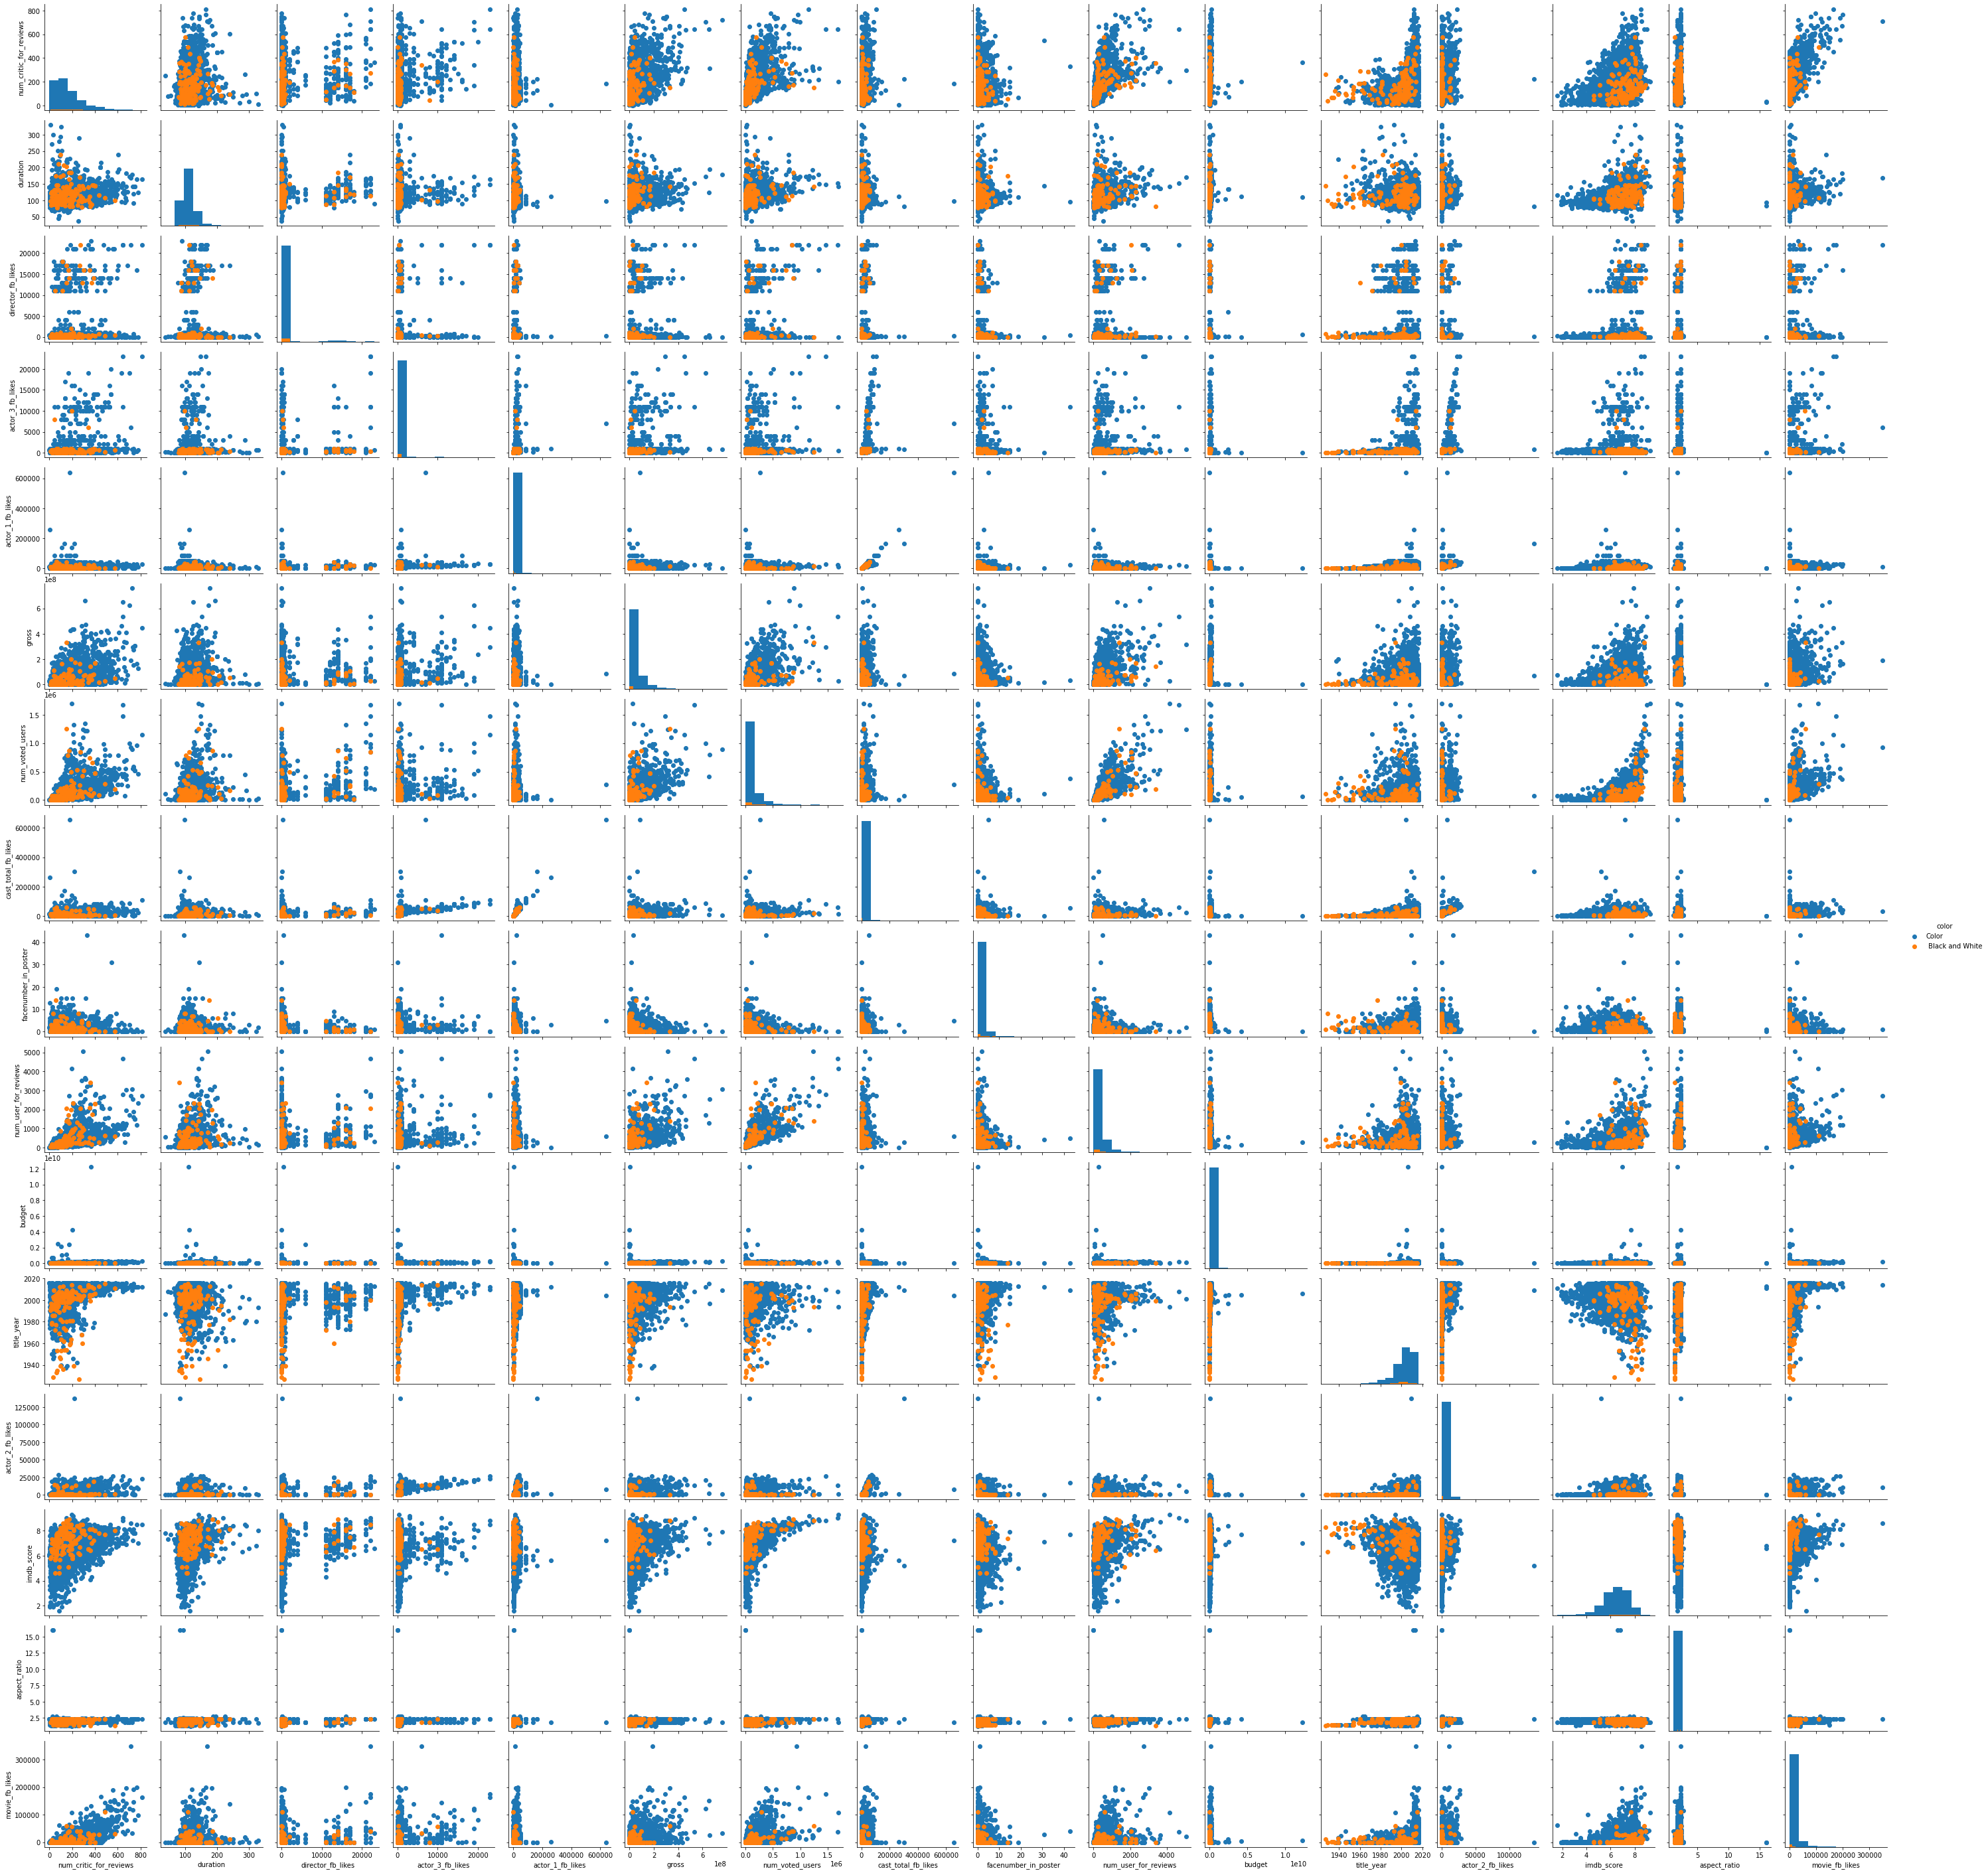

In [343]:
graph = sns.PairGrid(df, hue ='color')
# type of graph for diagonal
graph = graph.map_diag(plt.hist)
# type of graph for non-diagonal
graph = graph.map_offdiag(plt.scatter)
# to add legends
graph = graph.add_legend()
plt.show()


Un premier ensemble de graphique sur la Dataframe. J'ai pris comme variable separatrice de couleur sur les graphiques 'hue = color' avec deux valeurs. La couleur bleue pour les films en couleur et la couleur orange pour les films en noir et blanc.

<AxesSubplot:>

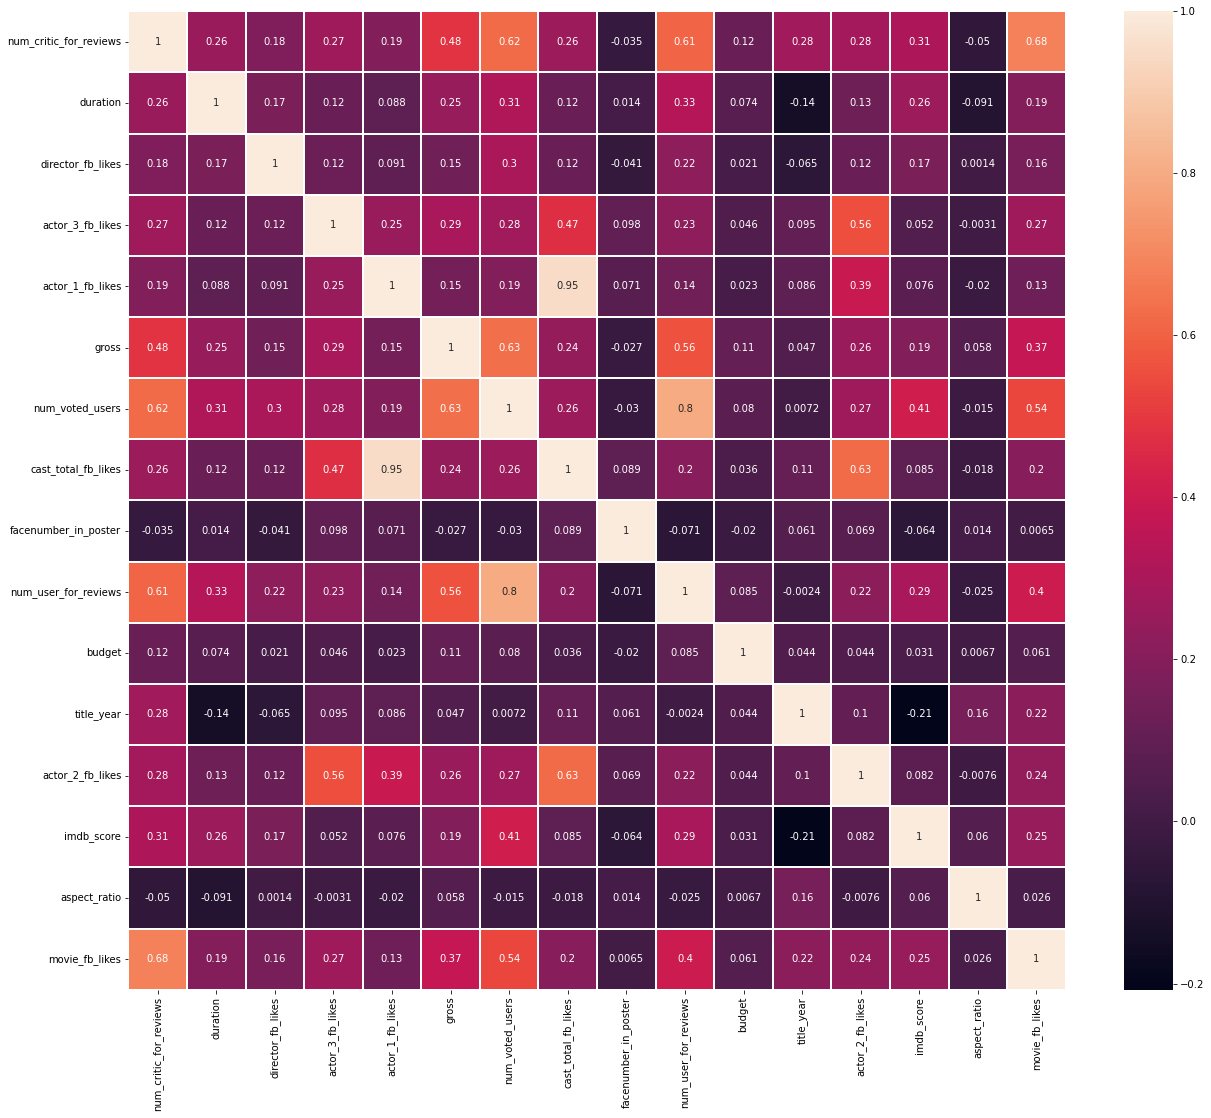

In [344]:
plt.figure(figsize=(21,18))
sns.heatmap(df_without_dubs.corr(), annot=True, linewidths=0.01)

Un heatmap pour voir la correlation entre les différentes variables de la DataFrame. On observe une forte correlation entre certaines variables qui laisse à prendre en compte ces dernières dans le modèle.

## **5. Pré-traitement**

**À FAIRE**

>Maintenant que vous commencez à bien connaître votre base de données, on va la préparer pour la partie modélisation.
>
>Sont donc attendus dans cette partie :
>- restriction aux données utiles à la prédiction : potentiellement certaines variables conservées pour la visualisation sont à supprimer pour la modélisation
>- création des échantillons d'entraînement et de test
>- gestion des variables catégoriques d'un côté et numériques de l'autre
>
>La standardisation n'étant pas toujours nécessaire puisque ça dépend des modèles, vous pouvez choisir de la faire dès maintenant ou bien d'attendre de voir si vous en avez besoin...

In [345]:
#transformer la variable color en numerique dichotomique
df = pd.concat((df.drop('color', axis=1), pd.get_dummies(df.color, drop_first=True)), axis=1)
df.head()

,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes,Color
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


Ici, l'hypothèse est de tester différentes variables et garder que celles dont les coefficients sont significatifs c'est àd ire impactent le modele.

In [346]:
#definition des variables de manières gloables avec la matrice X qui comprend l'ensemble des variables indépendantes et le vecteur y qui prend que la variable imdb_score
X= df[['num_critic_for_reviews','duration','actor_3_fb_likes', 'gross','num_voted_users','facenumber_in_poster','num_user_for_reviews', 'movie_fb_likes','Color']]
y = df['imdb_score']
X.shape, y.shape

((3954, 9), (3954,))

In [347]:
df.columns.astype

<bound method Index.astype of Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_fb_likes', 'actor_3_fb_likes', 'actor_2_name',
       'actor_1_fb_likes', 'gross', 'genres', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_fb_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_fb_likes', 'imdb_score',
       'aspect_ratio', 'movie_fb_likes', 'Color'],
      dtype='object')>

In [348]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3163, 9), (791, 9), (3163,), (791,))

In [349]:
#standardisation des variables du modele

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Il est important de souligner ici que la standardisation des varaibles n'impacte pas le modele

## **6. Une régression linéaire**

**À FAIRE**

>Tout est dans le titre. Vous devez ici entraîner et tester une régression linéaire pour la prédiction de la note IMDB.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des coefficients et de leur significativité
>- le choix d'une mesure d'évaluation du modèle et son interprétation
>- une validation croisée pour l'estimation de la qualité du modèle
>- *facultatif : l'ajout d'une régularisation Ridge ou Lasso pour déterminer si les résultats sont meilleurs*

In [350]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train_std, y_train)

LinearRegression()

In [351]:
# Evaluation du  modele de RL avec le score R2

score_train = linear.score(X_train_std, y_train)
score_test = linear.score(X_test_std, y_test)
print(f"{score_train =} et {score_test = }")

score_train =0.32736389393094456 et score_test = 0.3268460921427505


In [352]:
# Les coefficients du modele et leurs significations
from statsmodels.api import OLS, add_constant

model = OLS(y_train, add_constant(X_train_std))
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     170.5
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          8.48e-264
Time:                        17:11:50   Log-Likelihood:                -4050.6
No. Observations:                3163   AIC:                             8121.
Df Residuals:                    3153   BIC:                             8182.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4605      0.016    416.579      0.0

Les différents coefficients du modele ci-dessus matérialisé par les valeurs de p_value sont tous très significatifs au seuil de 1/1000 à l'exception de celui de la variable 'movie_fb_likes' qui  l'est au seuil de 5%.
Une mesure d'évaluation du modèle est le R2. Ainsi la variance du modele est expliquée à 0.33 par celle des variables indépendantes. 

In [403]:
#Validation croisé pour une meilleure estimation du modele

from sklearn.model_selection import cross_val_score

cross_val_score(LinearRegression(), X_train_std, y_train, cv=None)

array([0.29273356, 0.34851019, 0.32367763, 0.30800804, 0.33010038])

In [404]:
#Calcul des erreurs standard servant d'indicateur d'amélioration du modele 

from sklearn.metrics import mean_squared_error
error0 = round(mean_squared_error(linear.predict(X_test_std),y_test), 4)
error0

0.7392

*facultatif : l'ajout d'une régularisation Ridge ou Lasso pour déterminer si les résultats sont meilleurs*

 Modele de Regression Ridge avec les parametres de penalisation

In [405]:
# Définition des coefficients de regularisation à tester 
alphas = np.logspace(-5, 5, 200)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# on va entrainer le modèle

coefs = []
errors = []
for a in alphas:
  ridge.set_params(alpha = a)
  ridge.fit(X_train, y_train)
  coefs.append(ridge.coef_)
  errors.append(mean_squared_error(ridge.predict(X_test), y_test))


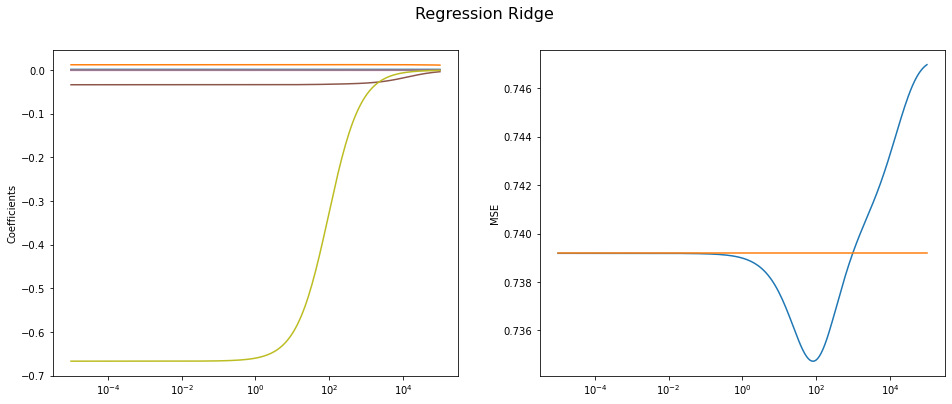

In [407]:
# Mettons en exergue l'affichage des courbes d'évolution des coef et des erreurs en foncion des valeurs de alphas
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))


ax1.plot(alphas, coefs)
ax1.set_xscale('log')
ax1.set_label('Paramètres de régularisation')
ax1.set_ylabel('Coefficients')

ax2.plot(alphas, errors,[10**-5, 10**5],[error0, error0])
ax2.set_xscale('log')
ax2.set_label('Paramètres de régularisation')
ax2.set_ylabel('MSE')

plt.suptitle('Regression Ridge', fontsize=16)

plt.show()

In [408]:
#Erreur minimum de la regression Ridge et la valeur de alpha qui minimise le modele

print(round(min(errors), 4), '\n', alphas[np.argmin(errors)])

0.7347 
 86.0346441668451


 Modele de Regression Lasso avec les parametres de penalisation

In [409]:
from sklearn.linear_model import Lasso
lasso = Lasso()

# entrainer le modele

coefs = []
errors = []
for a in alphas:
  lasso.set_params(alpha = a)
  lasso.fit(X_train_std, y_train)
  coefs.append(lasso.coef_ )
  errors.append(mean_squared_error(lasso.predict(X_test_std), y_test))

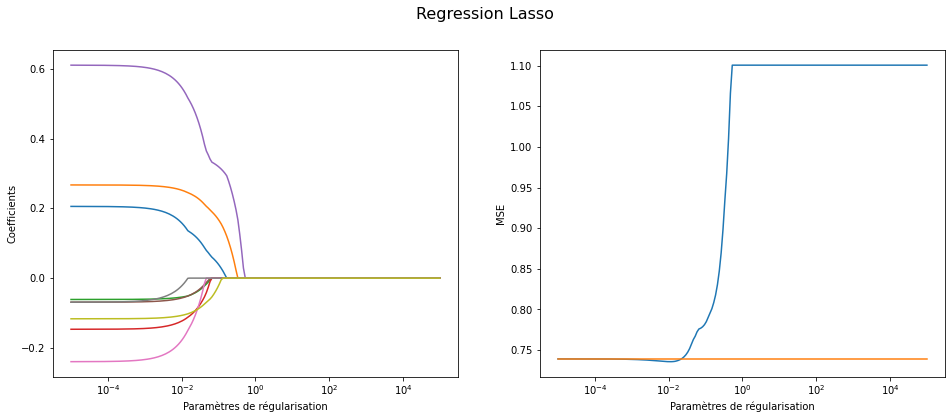

In [410]:
# Mettons en exergue l'affichage des courbes d'évolution des coef et des erreurs en foncion des valeurs de alphas

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.plot(alphas, coefs)
ax1.set_xscale('log')
ax1.set_xlabel('Paramètres de régularisation')
ax1.set_ylabel('Coefficients')


ax2.plot(alphas, errors, [10**-5, 10**5], [error0, error0])
ax2.set_xscale('log')
ax2.set_xlabel('Paramètres de régularisation')
ax2.set_ylabel('MSE')


plt.suptitle('Regression Lasso', fontsize=16)
plt.show()

In [411]:
#Erreur minimum de la regression Ridge et la valeur de alpha qui minimise le modele
print(round(min(errors),4), '\n', alphas[np.argmin(errors)])

0.7358 
 0.010353218432956626


<a id='autres_reg'></a>

## **7. D'autres modèles de régression**

**À FAIRE**

>Tout est encore dans le titre. Mettez en place le modèle **de régression** que vous souhaitez.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle avec `cross_val_score` ou `cross_validate`
>- affinage des éventuels hyperparamètres avec `GridSearchCV`

Etant donnée que la variable dépendante du modèle est une variable continue, d'autres modèles de régression existent pour prédire ce modèle comme knn, svm, random forest, etc...

In [425]:
#Tester chaque valeur du modele knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

cvgrid = GridSearchCV(
  estimator=KNeighborsRegressor(),
  param_grid={'n_neighbors':list(range(1, 10))},
  scoring='neg_mean_squared_error',
  return_train_score=False,
  cv = KFold(n_splits=10, shuffle=True)
)
cvgrid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_squared_error')

In [428]:
cross_val_score(KNeighborsRegressor(), X_train_std, y_train, cv =5)

array([0.24204897, 0.27915954, 0.2863304 , 0.2749219 , 0.26337413])

In [426]:
cvgrid.best_estimator_

KNeighborsRegressor(n_neighbors=8)

In [427]:
# Importer toutes les libraires necessaires à la mise en place des modeles de régression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

models = {

  'knn': KNeighborsRegressor(n_neighbors=10),
  'linear': LinearRegression(),
  'ridge': Ridge(),
  'lasso': Lasso(),
  'svr_l': SVR(kernel='linear', gamma='auto', C=1, degree=3),
  'svr_r': SVR(kernel='rbf', gamma='auto', C=1, degree=3),
  'svr_p': SVR(kernel='poly', gamma='auto', C=1, degree=3),
  'rfor': RandomForestRegressor(criterion='mse', max_depth=2, random_state=0)

}
for i, j in models.items():
  model = j
  scores = cross_val_score(model, X_train_std, y_train, cv=5)

  print(f"Le score de validation croisée du modele {i}: {scores} / score_moyen = {np.mean(scores)} / ")



Le score de validation croisée du modele knn: [0.2766265  0.3780271  0.3253023  0.3576164  0.31909668] / score_moyen = 0.3313337958627359
Le score de validation croisée du modele linear: [0.29273356 0.34851019 0.32367763 0.30800804 0.33010038] / score_moyen = 0.3206059594772252
Le score de validation croisée du modele ridge: [0.29273485 0.34863001 0.32363235 0.3080632  0.33004346] / score_moyen = 0.32062077572067904
Le score de validation croisée du modele lasso: [-1.06608397e-04 -2.96856048e-03 -2.07782617e-06 -5.08448278e-03
 -1.73584738e-04] / score_moyen = -0.0016670628450917492
Le score de validation croisée du modele svr_l: [0.28282525 0.34747488 0.31958227 0.28304603 0.32932504] / score_moyen = 0.3124506908855914
Le score de validation croisée du modele svr_r: [0.3939641  0.46916071 0.39339461 0.35890428 0.41206338] / score_moyen = 0.4054974153938719
Le score de validation croisée du modele svr_p: [-0.83972424 -1.00000496  0.0055747  -0.32537879 -0.82768936] / score_moyen = -0.5

<a id='irr'></a>

<a id='reg_to_class'></a>

## **8. De la régression à la classification**

**À FAIRE**

>Transformez le problème de régression en un problème de classification par une discrétisation du score IMDB en 5 classes : nul, bof, sympa, bon, super.  
>Justifiez votre découpage en indiquant quels seuils vous avez utilisé et pourquoi.

<a id='reglog'></a>

## **9. Une régression logistique**

**À FAIRE**

>Vous devez ici entraîner et tester une régression logistique pour la prédiction de la classe du film.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des *Odds-ratio* et de leur significativité
>- le choix d'une ou plusieurs mesures d'évaluation du modèle et leur interprétation
>- une validation croisée pour l'évaluation modèle
>- l'affinage des hyperparamètres avec l'outil qui va bien
>- peut-on tracer les courbes ROC et calculer l'AUC ? Pourquoi ?

<a id='autre_class'></a>

## **10. Un autre modèle de classification**

**À FAIRE**

>Au choix, une autre méthode de classification. Évidemment, sentez-vous libre d'en essayer plus d'une et de les comparer.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle
>- étude de l'importance des paramètres, si votre modèle le permet
>- affinage des éventuels hyperparamètres

<a id='option'></a>

## **11. En option**

Bravo, si vous êtes arrivés jusqu'ici !!!

Pour les flèches, hésitez pas à continuer si vous en voulez encore et pour les autres, hésitez pas à y revenir à l'occasion.

<a id='reco'></a>

### **11.1. Un outil de recommandation**

**À FAIRE**

>Question un peu plus ouverte pour terminer: en utilisant une méthode de clustering (donc d'apprentissage non-supervisé), construisez un petit outil de recommandation de films.  
>Pour un film donné, votre méthode doit donc retourner les films qui lui ressemblent le plus.  
>Pour rappel, on avait fait un petit exercice comme celui-cilorsqu'on avait vu les *k-plus proches voisins*, donc vous êtes invités à ne pas utiliser kNN, sinon c'est pas drôle...  
>Vous pourrez bientôt aller plus loin en créant une petite application web permettant une interface pour choisir un film.

<a id='save'></a>

### **11.2. Sauvegarder un modèle**

**À FAIRE**

>Utilisez le module `pickle` pour sauvegarder le meilleur de vos modèles et le recharger ensuite.

<a id='acp'></a>

### **11.3. Analyse en Composantes Principales**

**À FAIRE**

>Utilisez une ACP pour visualiser vos données en dimension 2 ou 3 avec des points dont la couleur varie en fonction de la classe.  